## Setup

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib ipympl

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.v2 as transforms

from pothole.boxes.selective_search import run_selective_search
from pothole.datasets import PotholeDataset
from pothole.plot import show_with_bbs

plt.rcParams['figure.figsize'] = [16.0, 12.0] # default: [6.4, 4.8]

In [2]:
image_transform = transforms.Compose(
    [
        transforms.ToDtype(torch.float32, scale=True),
        np.array,
    ]
)
allset = PotholeDataset('all', image_transform=image_transform)
images, targets = list(zip(*allset))

In [3]:
def show_selective_search(sample_number, limit=None):
    image = images[sample_number]
    proposals = run_selective_search(image)

    fig, ax = plt.subplots()

    fig.canvas.header_visible = False

    limit_text = f' (showing {limit})' if limit is not None else ''
    fig.suptitle(
        f'Sample {sample_number}\n'
        f'Selective search yielded {len(proposals)} proposals'
        f'{limit_text}'
    )

    show_with_bbs(ax, image, proposals[:limit])

## Selective search

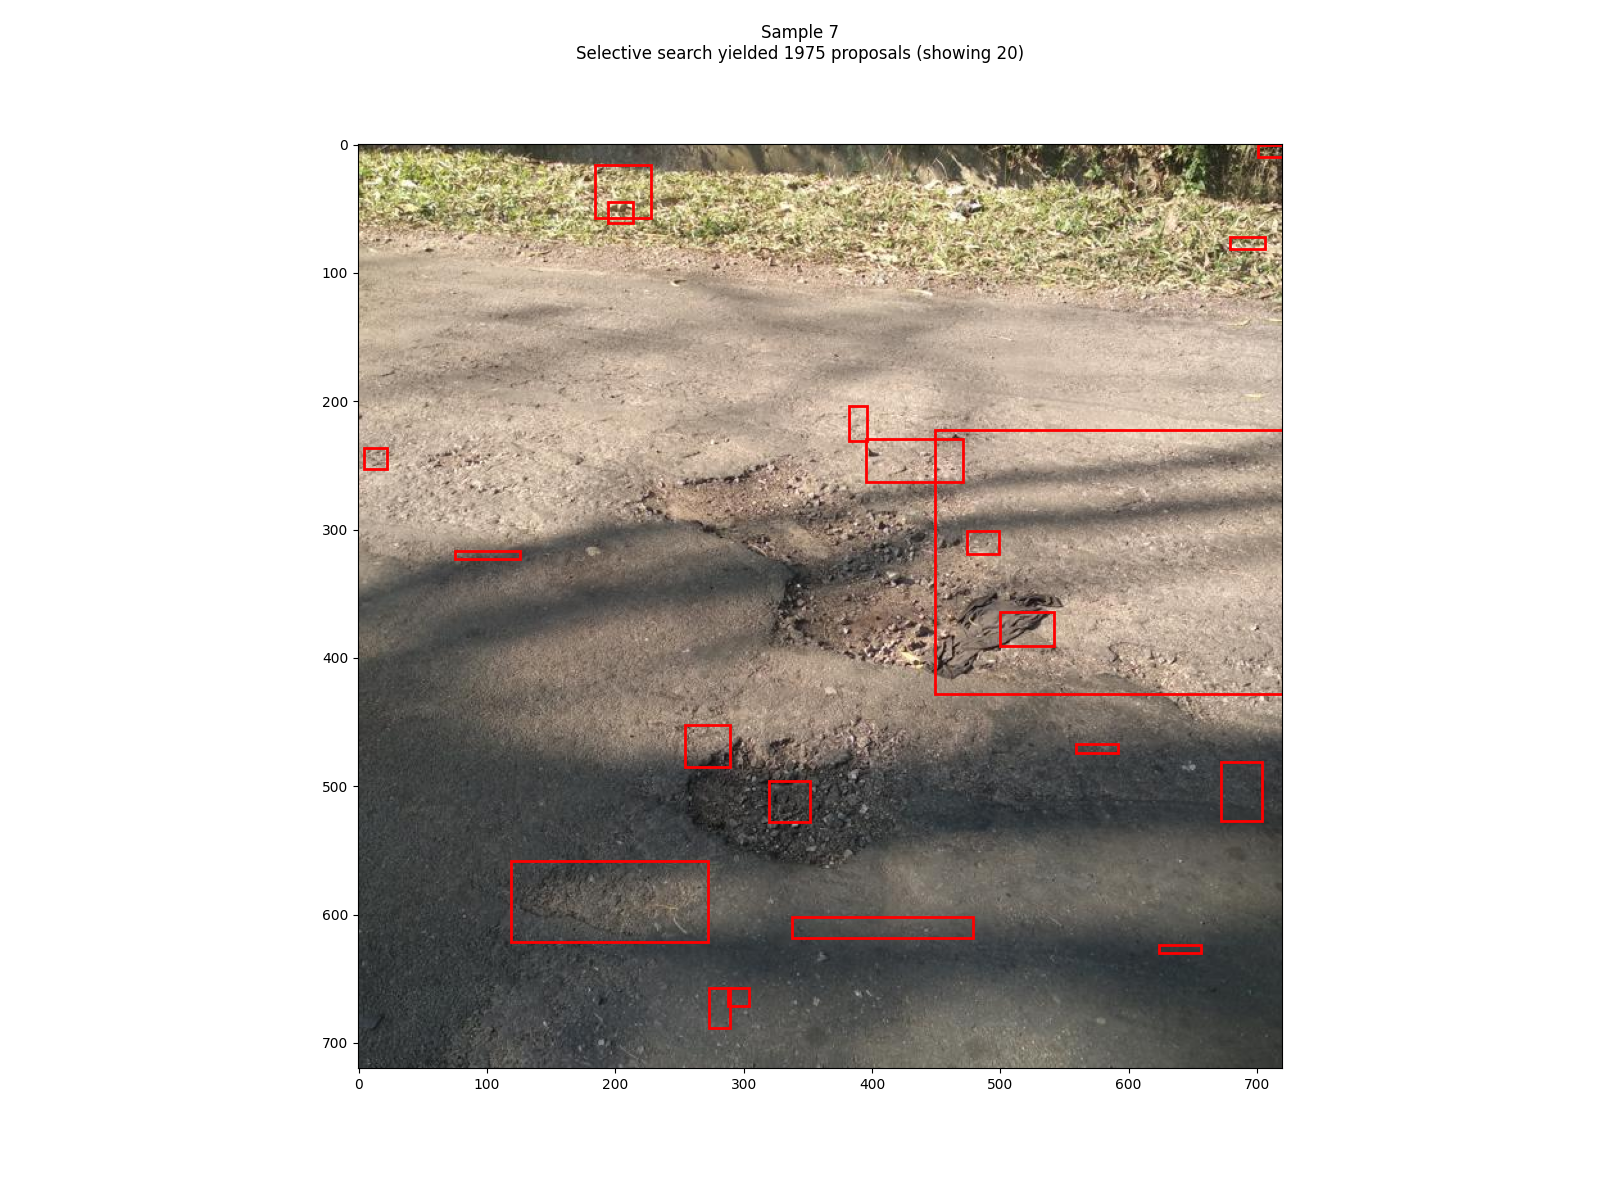

In [4]:
sample_number = 7
show_selective_search(sample_number, limit=20)